<a href="https://colab.research.google.com/github/swordwalid/ML-Projects-/blob/main/CNN_architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
x=[2,5,8,7,2,1,0,0]
x=np.array(x)

In [ ]:
arr1 = np.array([[1, 3, 5, 7], [2, 4, 6, 8],[3, 4, 9, 8]])
arr1


array([[1, 3, 5, 7],
       [2, 4, 6, 8],
       [3, 4, 9, 8]])

In [ ]:
arr1.shape

(3, 4)

In [ ]:
x[0]

2

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt


In [ ]:
!pip install keras-tuner -q

     |████████████████████████████████| 135 kB 22.2 MB/s 
     |████████████████████████████████| 1.6 MB 59.4 MB/s 


In [ ]:
import keras_tuner


In [ ]:
print(tf.__version__)

2.9.2


In [ ]:
fashion_mnist=keras.datasets.fashion_mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train=x_train/255
x_test=x_test/255

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
y_train.shape
# plt.figure(figsize=(1,1))
# plt.imshow(x_train[0])

(60000,)

In [ ]:

classes=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
def sample_plot(x,y,index):
  plt.figure(figsize=(1,1))
  plt.imshow(x_train[index])
  plt.xlabel(classes[y[index]])



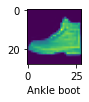

In [ ]:
sample_plot(x_train,y_train,50000)

In [ ]:
l=[(2,2),(3,3),(5,5)]
def Pool_size():

  return l[np.random.randint(len(l))]





In [ ]:
Pool_size()

(5, 5)

In [ ]:
x_train=x_train.reshape(len(x_train),1,28,28)
x_test=x_test.reshape(len(x_test),1,28,28)

In [ ]:
x_train.shape

(60000, 1, 28, 28)

In [ ]:
# hyperparameter tuning no of filter and filter size
l=[(2,2),(3,3)]

def build_model(hp):
  model=keras.Sequential([
      keras.layers.Conv2D(
          filters=hp.Int('conv_1_filter',min_value=16,max_value=128,step=16),
          kernel_size=hp.Choice('conv_1_kernel',[3,5]),
          activation='relu',
          input_shape=(28,28,1)),
      keras.layers.MaxPool2D(pool_size=Pool_size()),


      keras.layers.Conv2D(
          filters=hp.Int('conv_2_filter',min_value=16,max_value=128,step=16),
          kernel_size=hp.Choice('conv_2_kernel',[3,5]),
          activation='relu'

      ),

      keras.layers.MaxPool2D(pool_size=Pool_size()),

      keras.layers.Flatten(),

      keras.layers.Dense(units=hp.Int("units", min_value=32, max_value=512, step=32),
                         activation='LeakyReLU'),
      keras.layers.Dense(units=hp.Int("units", min_value=32, max_value=512, step=32),
                         activation='LeakyReLU'),

      keras.layers.Dense(10,activation='softmax')
])
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-3])),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [ ]:
build_model(keras_tuner.HyperParameters())

In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
tuner=keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    directory='output_cnn2',
    project_name='Mnist_Fashion'
)

In [ ]:
tuner.search(x_train,y_train,epochs=3,validation_split=0.1)

In [ ]:
model=tuner.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 96)                5

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,kernel_size=(3,3),data_format='channels_first',
                           activation='relu',input_shape=(1,28, 28)),
     tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32,kernel_size=(3,3),
                           activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(64,kernel_size=(3,3),
                           activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64,activation='relu',),
    tf.keras.layers.Dense(10,activation='softmax')



])
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [ ]:
model.fit(x_train,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 18s 6ms/step - loss: 0.6474 - accuracy: 0.7567 - val_loss: 0.4964 - val_accuracy: 0.8153
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4576 - accuracy: 0.8298 - val_loss: 0.4560 - val_accuracy: 0.8235
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4099 - accuracy: 0.8481 - val_loss: 0.4027 - val_accuracy: 0.8523
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3768 - accuracy: 0.8612 - val_loss: 0.3798 - val_accuracy: 0.8603
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3535 - accuracy: 0.8693 - val_loss: 0.3726 - val_accuracy: 0.8633
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3351 - accuracy: 0.8769 - val_loss: 0.3584 - val_accuracy: 0.8710
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3214 - accuracy: 0.8817 - val_loss: 0.3632 - val_accuracy

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2958 - accuracy: 0.8978


[0.29578202962875366, 0.8978000283241272]

In [ ]:
y_test.r

array([9, 2, 1, 1, 6], dtype=uint8)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

TypeError: ignored

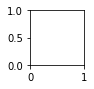

In [ ]:
sample_plot(x_test,y_test,1)

In [ ]:
y_pred=model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
y_pred[:5]

array([[1.2387912e-07, 8.7569632e-09, 1.5084621e-09, 1.3240621e-09,
        1.1380092e-08, 1.4327357e-05, 6.5662231e-09, 7.8596959e-06,
        2.6502209e-10, 9.9997771e-01],
       [5.8499182e-04, 6.4088504e-12, 9.9804199e-01, 2.2598250e-04,
        8.5643678e-06, 3.0303204e-11, 1.1383945e-03, 9.7632243e-11,
        1.4938503e-07, 1.2341195e-09],
       [2.5699745e-10, 1.0000000e+00, 1.6976347e-11, 1.0079534e-10,
        1.3248052e-11, 2.0498025e-14, 2.9121889e-11, 3.4310825e-15,
        1.8536993e-12, 4.3582920e-15],
       [2.0327775e-08, 9.9999940e-01, 2.3982043e-09, 2.0425416e-07,
        2.2668765e-07, 1.2627129e-11, 7.6163367e-08, 1.6462812e-12,
        1.4984966e-11, 5.7622635e-12],
       [5.5603778e-01, 2.8884651e-07, 2.9847147e-02, 4.2781982e-04,
        5.5107856e-03, 6.2537483e-06, 4.0815499e-01, 7.6368651e-06,
        5.1723777e-07, 6.8309746e-06]], dtype=float32)

In [ ]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[9, 2, 1, 1, 0]

In [ ]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
classes[y_classes[4]]

'T-shirt/top'

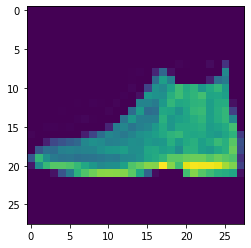

In [ ]:
plt.imshow(x_test[0].reshape(28,28))